<a href="https://colab.research.google.com/github/saragandhii/Attention-Detection-Data-Processing-ML-model/blob/main/attention_detection_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne
# Importing Extra Utility
from mne import Epochs, pick_types
from mne.preprocessing import ICA
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.channels import make_standard_montage
from mne.decoding import UnsupervisedSpatialFilter
from mne.viz import plot_topomap

In [ ]:
#### Load data ####
raw_data = {"casey": [], "shuai": [], "diego": []}

# Iterate thru all trials for each subject
for subj in raw_data.keys():
    for i in range(1, 4):
        # Read lines manually and filter
        with open(f'/content/drive/Shareddrives/Neurotech/Neurotech_Data/{subj}_data/{subj}_{i}/BrainFlow-RAW_{subj}_{i}.csv', 'r') as f:
            lines = f.readlines()
            good_lines = [line for line in lines if len(line.strip().split('\t')) == 24]

        # Now safely load into array
        trial_data = np.genfromtxt(good_lines, delimiter='\t', dtype=str)

        trial_data = np.char.replace(trial_data, '\t', ' ')
        trial_data = trial_data.astype(float)

        # Declares channel names and types of each set of data
        ch_names = ['Channel {}'.format(i) for i in range(trial_data.shape[1])]
        ch_types = ['eeg' for i in range(trial_data.shape[1])]

        # Create info structures and RawArray objects for each set of data
        sfreq = 250  # sample rate in Hz
        info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
        raw_array = mne.io.RawArray(trial_data.T, info)

        # Removing irrelevant channels
        ch_names = [raw_array.ch_names]
        ch_names_to_keep = [ch_names[0][0:10]]
        raw_array = raw_array.pick_channels(ch_names_to_keep[0])

        # Add RawArray
        raw_data[subj].append(raw_array)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/General/Neurotech/Neurotech_Data/casey_data/casey_1/BrainFlow-RAW_casey_1.csv'

<RawArray | 10 x 746788 (2987.2 s), ~57.0 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
casey_1: 86.9239899 987.4625801
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
<RawArray | 10 x 465799 (1863.2 s), ~35.6 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting 

<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
casey_2: 10.862161 910.2505783
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
<RawArray | 10 x 234984 (939.9 s), ~17.9 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
casey_3: 7.29218 907.2804501
NOTE: p

<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


Plotting power spectral density (dB=True).
<RawArray | 10 x 741344 (2965.4 s), ~56.6 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
shuai_1: 94.9881882 992.9928758
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
<RawArray | 10 x 241964 (967.9 s), ~18.5 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
shuai_2: 10.7412962 910.7634539
NOT

<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
<RawArray | 10 x 484461 (1937.8 s), ~37.0 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
shuai_3: 11.0639142 908.4363071
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
<RawArray | 10 x 382908 (1531.6 s), ~29.2 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
diego_1: 86.0286821 986.5528813
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
<RawArray | 10 x 216338 (865.4 s), ~16.5 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
diego_2: 20.7974257 864.348
NOTE: p

<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


Plotting power spectral density (dB=True).
<RawArray | 10 x 242500 (970.0 s), ~18.5 MiB, data loaded>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


diego_3: 25.073617 927.7651809
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-4-5058a70949a5>:57: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


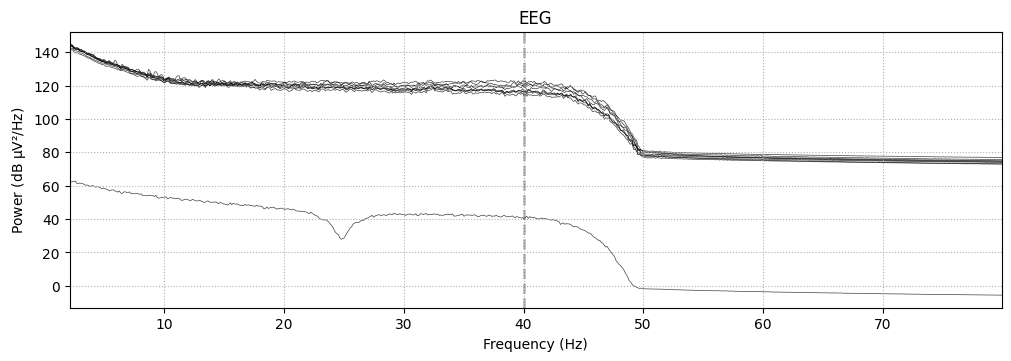

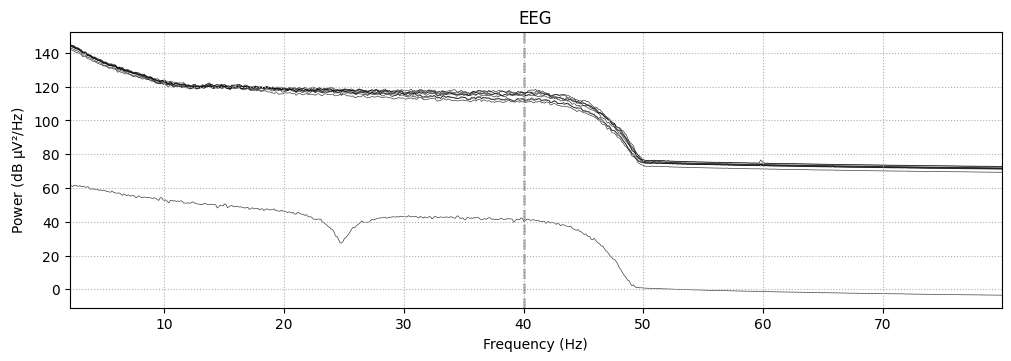

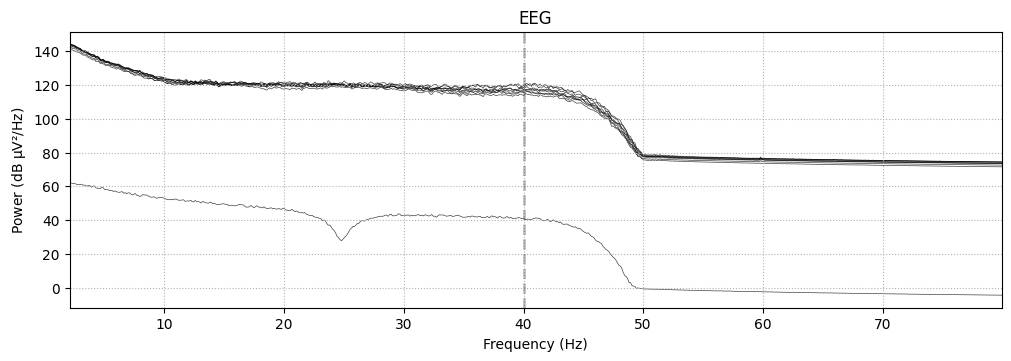

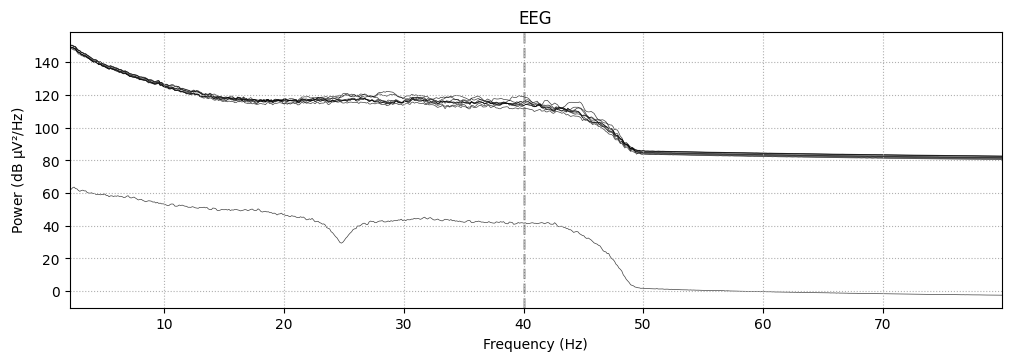

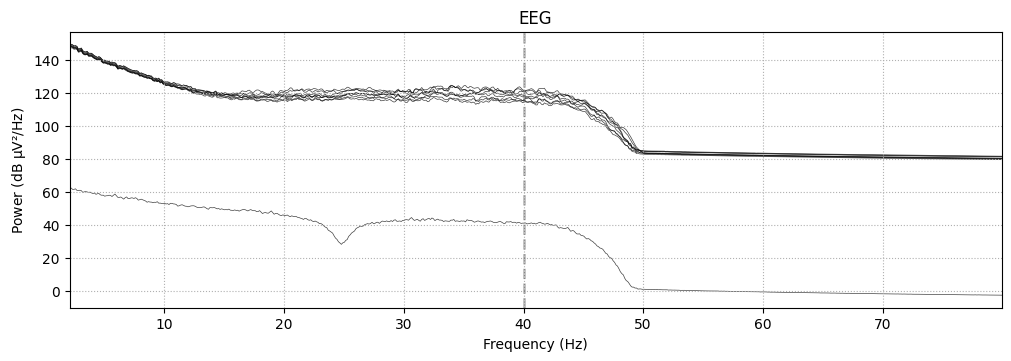

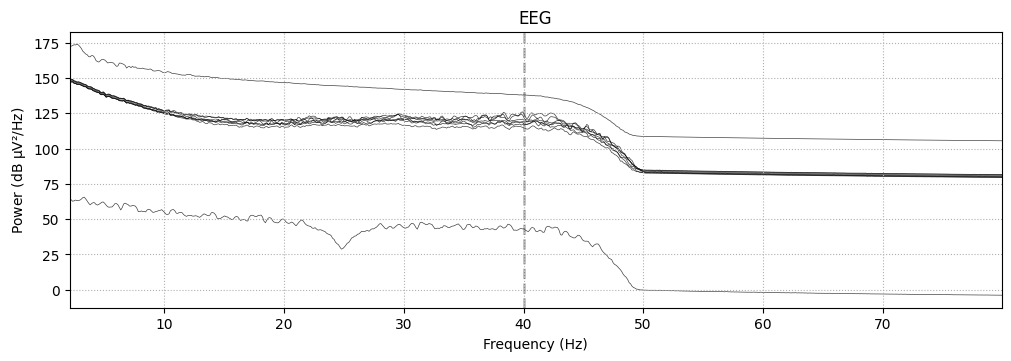

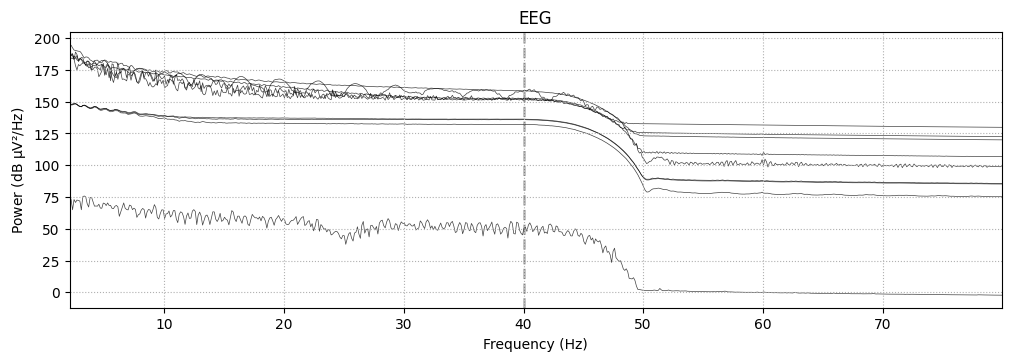

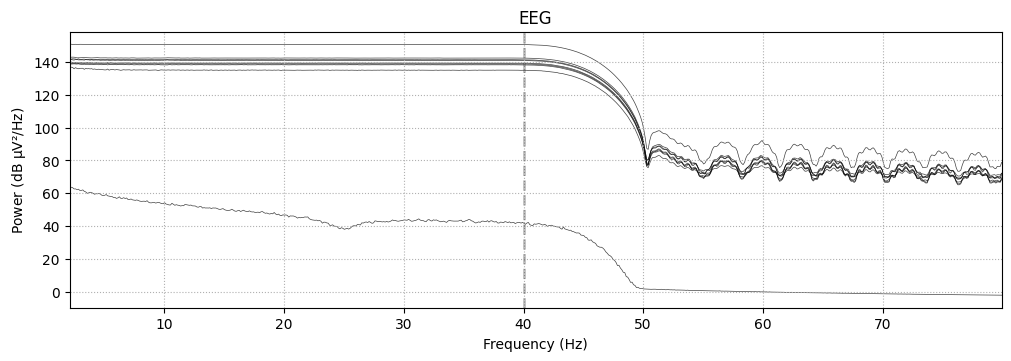

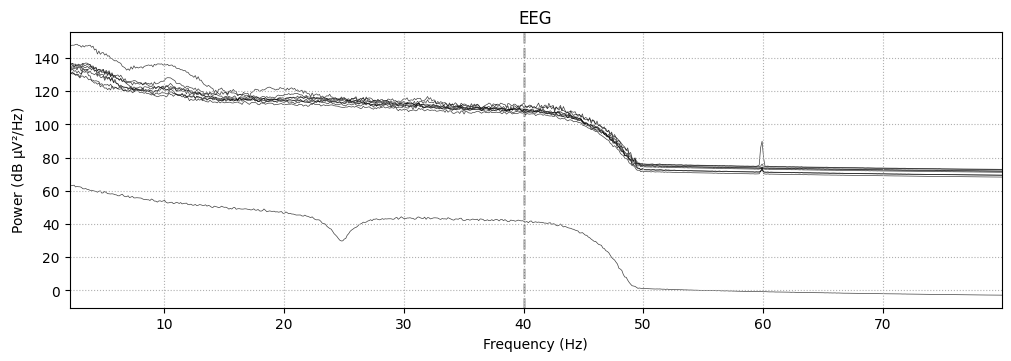

In [ ]:
import pandas as pd
import mne  # Assuming MNE is being used for EEG data

# Load segmentation data
data_segments = pd.read_csv('/content/drive/Shareddrives/Neurotech/Neurotech_Data/psychopysegmentation.csv')

filtered_data = {"casey": [], "shuai": [], "diego": []}
baseline_data = {"casey": [], "shuai": [], "diego": []}

# Iterate through all trials for each subject
for subj in filtered_data.keys():
    for i in range(3):
        participant_label = f"{subj}_{i+1}"

        # Skip Diego's first trial cleanly
        #if participant_label == "diego_1":
            #print("Skipping Diego's first trial")
            #continue

        # Filter current trial data
        curr_trial = raw_data[subj][i]
        print(curr_trial)
        filtered_trial = curr_trial.copy().filter(
            l_freq=1, h_freq=40, picks=None, method='fir', fir_design='firwin',
            l_trans_bandwidth='auto', h_trans_bandwidth='auto',
            filter_length='auto', phase='zero'
        )

        # Removing Bad Channels
        bad_channels = ['Channel 0']  # List of channel names to mark as bad
        filtered_trial.info['bads'] = bad_channels
        filtered_trial.pick_types(eeg=True, exclude='bads')

        # Crop filtered_trial to within experiment duration
        curr_row = data_segments[data_segments["Participant"] == f"{subj}_{i+1}"].index
        start = data_segments.at[curr_row[0], "Task_Started(s)"]
        end = data_segments.at[curr_row[0], "StroopEnd(s)"]
        start = float(start)
        end = float(end)

        duration = filtered_trial.times[-1] - filtered_trial.times[0]  # Time in seconds
        if end > duration:
          end = duration -1


        print(f"{subj}_{i+1}: {start} {end}")

        baseline_trial = filtered_trial.copy()
        baseline_trial.crop(tmin=0, tmax=start)
        max_time = filtered_trial.times[-1]  # or filtered_trial.n_times / sfreq
        filtered_trial = filtered_trial.crop(tmin=start, tmax=end)

        # Add filtered_trial to filtered_data dictionary
        filtered_data[subj].append(filtered_trial)
        baseline_data[subj].append(baseline_trial)

        filtered_trial.plot_psd(fmin=2, fmax=80, average=False, show=True)


In [ ]:
# Loop through all subjects and all trials
for subj in filtered_data.keys():
    for idx, filtered_trial in enumerate(filtered_data[subj]):
        print(f"Plotting {subj} trial {idx+1}")
        filtered_trial.plot(
            scalings='50e-6',
            n_channels=8,     # set 7 channels, or you can use trial.info['nchan']
            duration=5,      # show 10 seconds per screen
            title=f"{subj} Trial {idx+1}",
            show=True
        )


NameError: name 'filtered_data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

X = []
y = []

# Feature extraction helper
def extract_features(raw):
    data = raw.get_data()  # shape: (n_channels, n_times)
    data = data[np.newaxis, ...]  # shape becomes (1, n_channels, n_times)
    mean = np.mean(data, axis=2)
    std = np.std(data, axis=2)
    max_val = np.max(data, axis=2)
    min_val = np.min(data, axis=2)
    features = np.concatenate((mean, std, max_val, min_val), axis=1).flatten()
    return features

# Loop through each subject's trials
for subj in filtered_data:
    for attention_trial, baseline_trial in zip(filtered_data[subj], baseline_data[subj]):
        # Attention condition data (during focused task)
        X.append(extract_features(attention_trial))
        y.append(1)  # Attention Signal

        # Baseline condition data (during rest or distraction)
        X.append(extract_features(baseline_trial))
        y.append(0)  # Baseline (Inattention) Signal

X = np.array(X)
y = np.array(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
print(X.shape)
print(y.shape)
print(np.unique(y, return_counts=True))


(18, 36)
(18,)
(array([0, 1]), array([9, 9]))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


In [ ]:
# SVM

from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"SVM Accuracy: {acc:.2f}")

SVM Accuracy: 0.75


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

Random Forest Accuracy: 0.75


In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain the model on reduced data
clf_2d = SVC(kernel='linear', C=1)
clf_2d.fit(X_train_2d, y_train)

# Plot using the 2D data and model
plot_svm_decision_boundary(X_train_2d, y_train, clf_2d)

NameError: name 'plot_svm_decision_boundary' is not defined

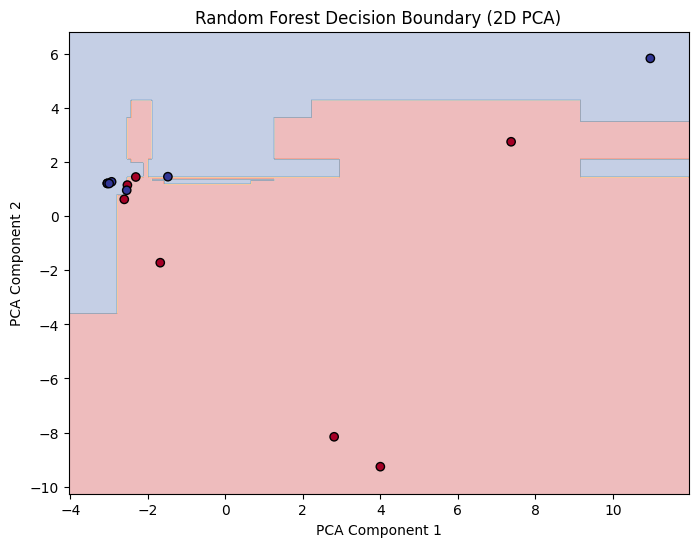

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Step 2: Train Random Forest on 2D data
rf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2d.fit(X_train_2d, y_train)

# Step 3: Plotting function
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Step 4: Plot decision boundary
plot_decision_boundary(X_train_2d, y_train, rf_2d, title="Random Forest Decision Boundary (2D PCA)")


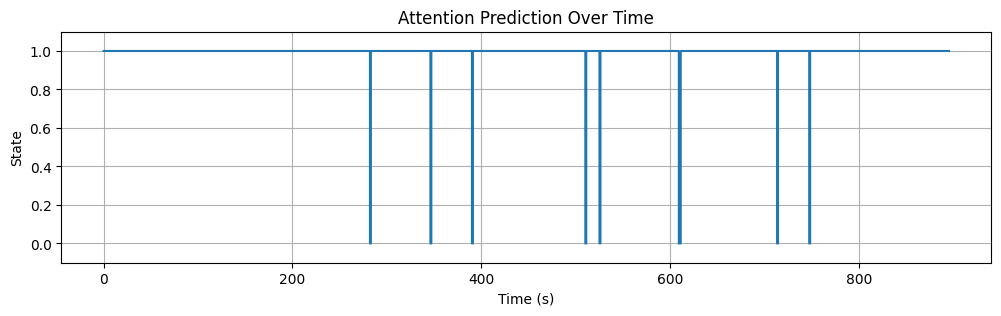

In [ ]:
import matplotlib.pyplot as plt

def sliding_window_classification(raw, clf, scaler, window_size=5, step_size=1):
    sfreq = raw.info['sfreq']
    window_samples = int(window_size * sfreq)
    step_samples = int(step_size * sfreq)

    predictions = []
    times = []

    for start in range(0, raw.n_times - window_samples, step_samples):
        end = start + window_samples
        segment = raw.copy().crop(tmin=start/sfreq, tmax=end/sfreq)
        features = extract_features(segment).reshape(1, -1)
        features_scaled = scaler.transform(features)
        pred = clf.predict(features_scaled)
        predictions.append(pred[0])
        times.append(start / sfreq)

    return times, predictions

# Choose one subject/trial to visualize
example_raw = filtered_data['casey'][0]  # change to another trial if needed

# Run classification over time
times, preds = sliding_window_classification(example_raw, clf, scaler)

# Plot
plt.figure(figsize=(12, 3))
plt.step(times, preds, where='post', label='Attention (1) / Inattention (0)')
plt.ylim(-0.1, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("Attention Prediction Over Time")
plt.grid(True)
plt.show()


In [ ]:
window_size = 5  # in seconds
sfreq = 250  # your sample rate
samples_per_window = int(window_size * sfreq)

preds_list = []
times_list = []
trial_labels = []

for subj in ["casey", "shuai", "diego"]:
    for i, trial in enumerate(filtered_data[subj]):
        data = trial.get_data()  # shape: (n_channels, n_times)
        n_windows = data.shape[1] // samples_per_window

        preds = []
        times = []

        for w in range(n_windows):
            start = w * samples_per_window
            end = start + samples_per_window
            window = data[:, start:end]

            # Feature extraction on window
            mean = np.mean(window, axis=1)
            std = np.std(window, axis=1)
            max_val = np.max(window, axis=1)
            min_val = np.min(window, axis=1)
            features = np.concatenate((mean, std, max_val, min_val)).reshape(1, -1)

            # Scale & predict
            features_scaled = scaler.transform(features)
            pred = clf.predict(features_scaled)[0]

            preds.append(pred)
            times.append(trial.times[start])

        preds_list.append(preds)
        times_list.append(times)
        trial_labels.append(f"{subj}_{i+1}")


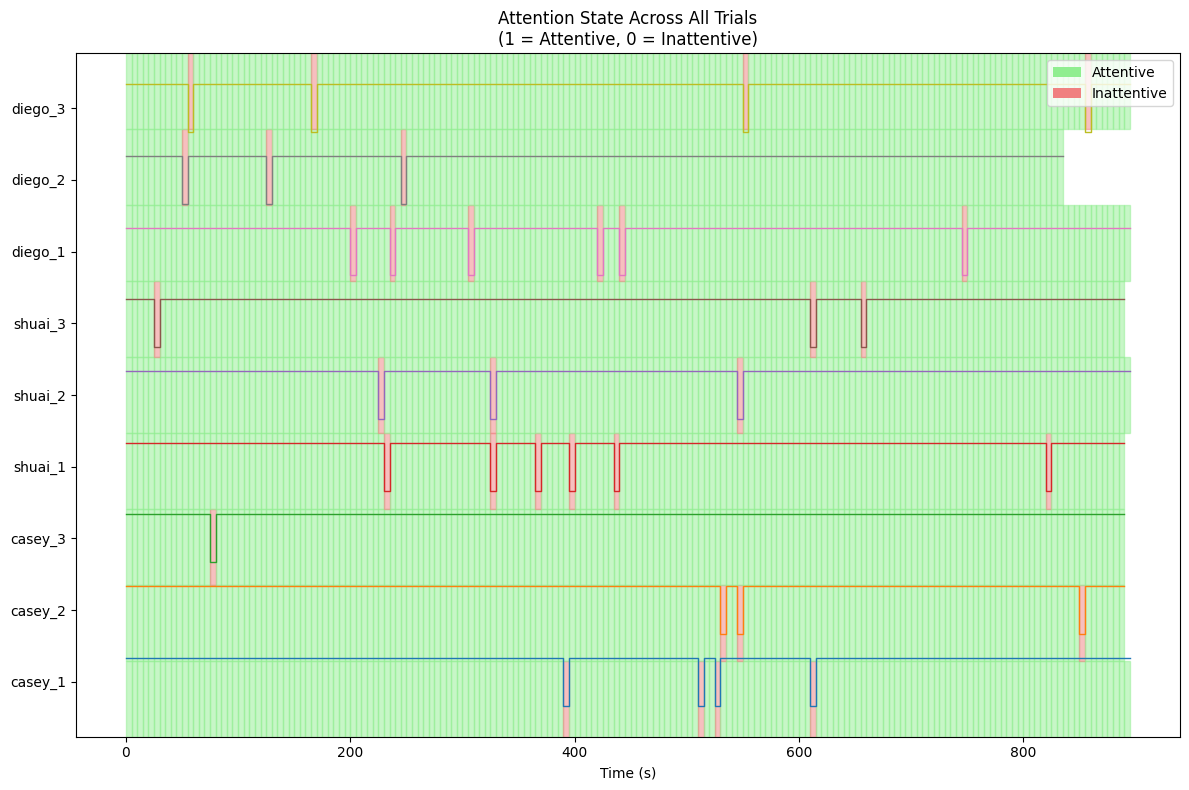

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you have this list of predictions and their times per trial
# preds_list = list of lists of predictions for each trial
# times_list = list of lists of times for each trial
# trial_labels = ['casey_1', 'casey_2', ..., 'diego_3']

fig, ax = plt.subplots(figsize=(12, 8))

offset = 1.5  # vertical spacing between trials
yticks = []
yticklabels = []

for idx, (preds, times, label) in enumerate(zip(preds_list, times_list, trial_labels)):
    # Offset predictions to stack them vertically
    preds_offset = np.array(preds) + idx * offset

    # Color band fill
    for i in range(len(times) - 1):
        color = 'lightgreen' if preds[i] == 1 else 'lightcoral'
        ax.axvspan(times[i], times[i+1], ymin=(idx * offset)/ (offset * len(preds_list)),
                   ymax=((idx+1) * offset)/ (offset * len(preds_list)), color=color, alpha=0.5)

    # Plot line (optional)
    ax.step(times, preds_offset, where='post', linewidth=1)

    # Store y-axis info
    yticks.append(idx * offset + 0.5)
    yticklabels.append(label)

# Labels
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xlabel("Time (s)")
ax.set_title("Attention State Across All Trials\n(1 = Attentive, 0 = Inattentive)")

# Optional legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgreen', label='Attentive'),
                   Patch(facecolor='lightcoral', label='Inattentive')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()
